In [1]:
import numpy as np
import pylab as plt

In [2]:
observaciones = np.genfromtxt('movimiento.dat',delimiter=' ')

In [3]:
print(observaciones.shape)

(100, 2)


In [4]:
x_obs = observaciones[:,0]
y_obs = observaciones[:,1]

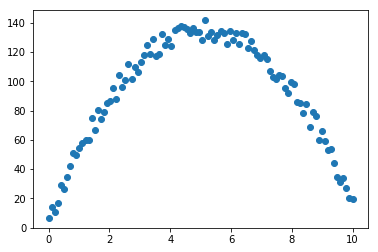

In [5]:
fig1, ax1 = plt.subplots()
ax1.scatter(x_obs,y_obs)
plt.show()
fig1.savefig('scatter_movimiento.pdf')
plt.close()

In [6]:
def funcion_estimada(x,coef):
    return -coef[0]*(x-coef[1])**2 + coef[2] 

In [7]:
def likelihood(y_obs,y_est):
    chi2 = np.sum(((y_obs-y_est)/np.std(y_obs))**2)
    l = np.exp(-chi2/2.0)
    l_min = 1e-50
    if l < l_min:
        return l_min
    else:
        return l  

0.00


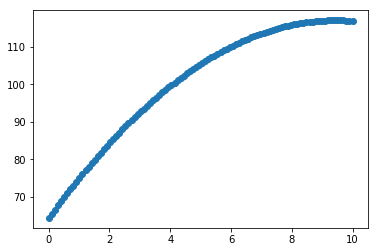

In [8]:
n_puntos = 100000
coef = [np.random.rand(3)]
coef[0][1]*=10
coef[0][2]*=150
y_est = funcion_estimada(x_obs,coef[0])
lklhood = [likelihood(y_obs,y_est)]
print("%.2f" % lklhood[0])
plt.scatter(x_obs,y_est)
plt.show()
plt.close()

In [9]:
for punto in range(0,n_puntos):
    coef_nuevo = np.random.normal(coef[punto], [20,30,30]) 
    y_est_nuevo = funcion_estimada(x_obs,coef_nuevo)
    lklhood_nuevo = likelihood(y_obs,y_est_nuevo)   
    alpha = lklhood_nuevo/lklhood[punto]   
    if alpha >= 1:
        coef.append(coef_nuevo)
        lklhood.append(lklhood_nuevo)
    elif alpha > np.random.rand():
        coef.append(coef_nuevo)
        lklhood.append(lklhood_nuevo)
    else:
        coef.append(coef[punto])
        lklhood.append(lklhood[punto])

In [10]:
max_id = np.argmax(lklhood)
coef_max = coef[max_id]
lklh_max = lklhood[max_id]
y_est_max = funcion_estimada(x_obs,coef_max)

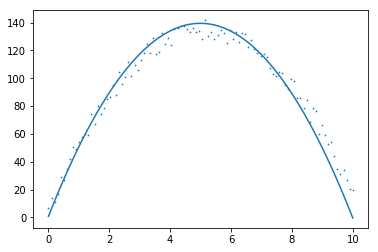

In [11]:
fig2, ax2 = plt.subplots()
ax2.scatter(x_obs,y_obs,s=0.5)
ax2.plot(x_obs,y_est_max)
plt.show()
fig2.savefig('estimacion_movimiento.pdf')
plt.close()

In [12]:
print(lklh_max)

0.142998296983
